In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
#import dataset
data=pd.read_csv("dataset_olympics.csv")

In [45]:
# show data
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [46]:
# show data
data.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
69995,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
69996,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN
69999,35658,Marek Fiurek,M,23.0,180.0,68.0,Czech Republic,CZE,1998 Winter,1998,Winter,Nagano,Nordic Combined,Nordic Combined Men's Team,NaN


In [47]:
# show heading/column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


##### The dataset contains 70,000 records of Olympic athletes with 15 columns, including demographic details (e.g., Age, Sex, Height, Weight), event information (Sport, Event, Year), and performance (Medal). Some columns have missing values, especially in Age, Height, Weight, and Medal, which is important to consider during analysis.

In [48]:
#summary
data.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


##### The summary statistics reveal that the average athlete age is around 25 years, with height and weight averaging 175 cm and 70 kg, respectively.

In [49]:
#summary object
data.describe(include=["object"])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


##### The most frequent entries include common values gender male , popular teams such as USA, and frequent Olympic events like football Men's footballs.

In [50]:
#check null value
data.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

##### The dataset has missing values in key columns: Age, Height , Weight , and Medal . This indicates the need for careful handling of null values, especially for analyses involving athlete physical attributes or medal statistics.


In [51]:
#check duplicate value
data.duplicated().sum()

383

#### shows the number of duplicate rows in the dataset.indicates the presence of repeated records, which may need to be removed to ensure accurate analysis.

In [52]:
data.drop_duplicates(inplace=True)

In [53]:
data.duplicated().sum()

0

### How many male vs. female athletes are in the dataset?

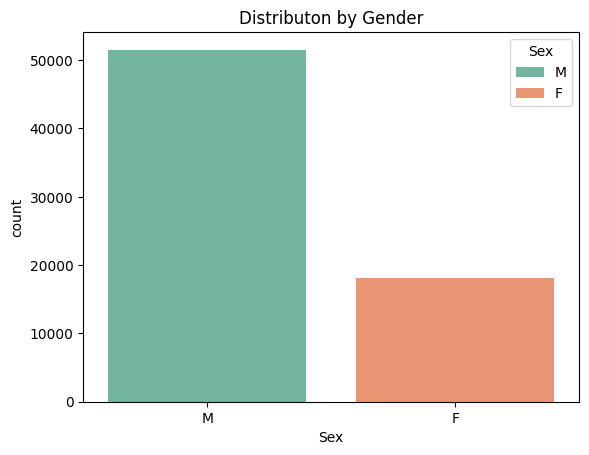

In [54]:
sns.countplot(data=data, x="Sex",hue="Sex",palette="Set2",legend=True)
plt.title("Distributon by Gender")
plt.show()

##### The count plot shows that male athletes outnumber female athletes in the dataset. This indicates a historical gender imbalance in Olympic participation, which can be explored further by year or sport.

### What is the most common age of athletes?



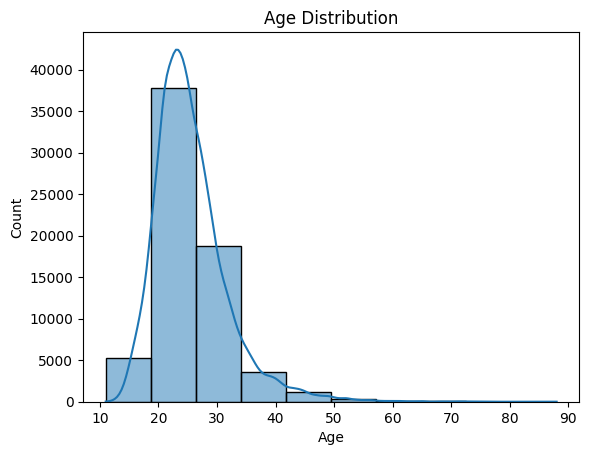

In [55]:
sns.histplot(data= data, x="Age",bins=10,kde=True)
plt.title("Age Distribution")
plt.show()

##### The histogram shows that the most common age of athletes is around 20 to 25 years, with a sharp peak near age 23. 

### What is the most common height range among athletes?

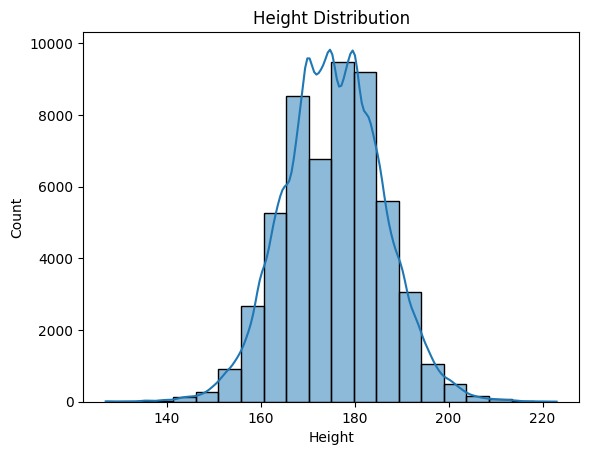

In [56]:
sns.histplot(data=data,x="Height",bins=20,kde=True)
plt.title("Height Distribution")
plt.show()

##### the histogram indicates that the most common height range among athletes is between 170 cm and 180 cm, with a peak near 175 cm. 

### What is the weight range of athletes?

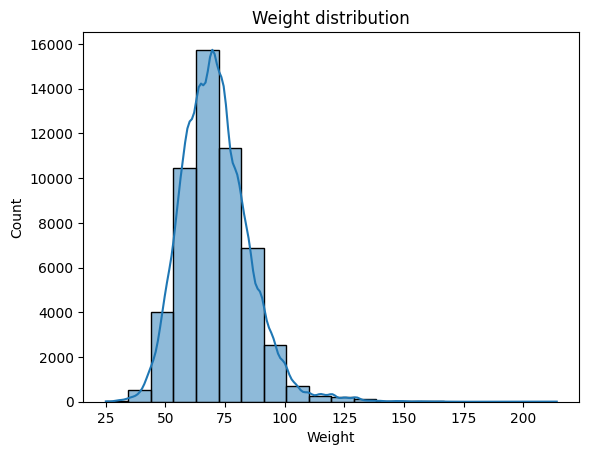

In [57]:
sns.histplot(data=data,x="Weight",bins=20,kde=True)
plt.title("Weight distribution")
plt.show()

##### The histogram shows that the most common weight range among athletes is between 60 kg and 75 kg, with a peak around 70 kg. 

### How many medals of each type are present in the dataset?

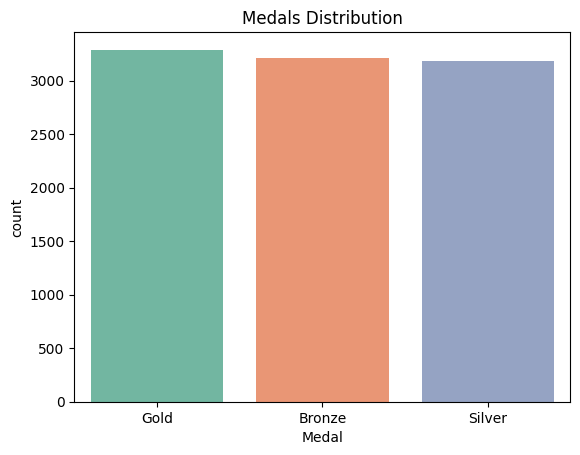

In [58]:
sns.countplot(data=data, x="Medal",hue="Medal",palette="Set2",legend=False)
plt.title("Medals Distribution")
plt.show()

##### The count plot shows that the number of **Gold, Silver, and Bronze medals is nearly equal**, each totaling slightly above **3,100**. This balanced distribution suggests consistent awarding across medal types in Olympic events recorded in the dataset.


### Which years had the highest or lowest counts of medals?

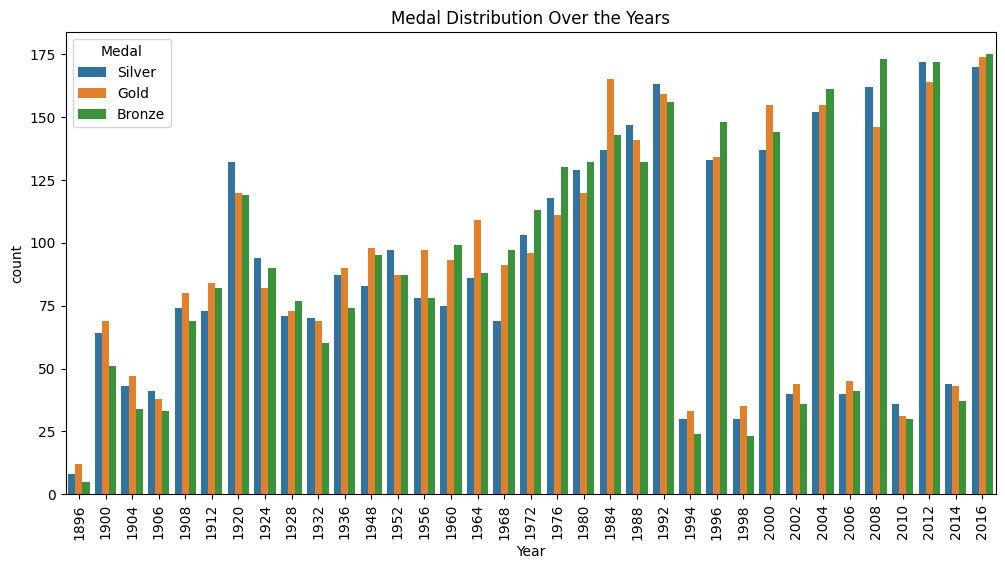

In [59]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=data, x="Year", hue="Medal")
plt.title("Medal Distribution Over the Years")
plt.xticks(rotation=90)               
plt.show()

##### The plot shows that the most medals were awarded in recent years like 2008, 2012, and 2016, reflecting the increasing scale of the Olympics. In contrast, early years like 1896 and 1900 had significantly fewer medals, likely due to fewer events and participants.










### How does the average age change over different years?

In [60]:
year_avg_age=data.groupby("Year")["Age"].mean()
year_avg_age

Year
1896    23.029412
1900    29.119883
1904    27.063241
1906    26.989474
1908    27.000000
1912    27.965552
1920    29.241135
1924    28.252267
1928    27.973564
1932    29.606987
1936    27.245665
1948    28.363170
1952    26.273684
1956    26.316156
1960    25.136156
1964    24.852107
1968    24.316722
1972    24.126448
1976    23.656820
1980    23.312364
1984    24.060328
1988    24.257374
1992    24.637827
1994    24.487516
1996    25.338210
1998    25.143860
2000    25.435177
2002    26.029095
2004    25.780111
2006    26.091716
2008    25.685148
2010    26.150776
2012    25.993485
2014    26.082814
2016    26.259592
Name: Age, dtype: float64

##### The average age of athletes has shown a gradual increase over the years, indicating that athletes are competing at slightly older ages in more recent Olympics.

### How does the typical height vary across different sports?



In [61]:
sport_median_height=data.groupby("Sport")["Height"].median()
sport_median_height

Sport
Alpine Skiing       173.0
Alpinism              NaN
Archery             172.0
Art Competitions    183.0
Athletics           176.0
                    ...  
Tug-Of-War          182.0
Volleyball          187.5
Water Polo          185.0
Weightlifting       168.0
Wrestling           172.0
Name: Height, Length: 65, dtype: float64

##### Athlete height varies by sport — taller in Basketball and Volleyball, shorter in Gymnastics and Diving, based on sport-specific physical demands.



In [62]:
sport_median_height.max()

190.0

In [63]:
sport_median_height[sport_median_height == 190.0]

Sport
Basketball    190.0
Name: Height, dtype: float64

In [64]:
sport_median_height.min()

164.0

In [65]:
sport_median_height[sport_median_height == 164.0]

Sport
Gymnastics    164.0
Name: Height, dtype: float64

### How many male and female athletes did each country send?

In [66]:
country_gender_count=data.groupby(["NOC","Sex"])["ID"].count().sort_values(ascending=True)
country_gender_count

NOC  Sex
COK  F         1
BDI  M         1
MHL  M         1
TUV  M         1
KIR  F         1
            ... 
CAN  M      1749
GBR  M      2628
ITA  M      3191
USA  M      3683
FRA  M      3788
Name: ID, Length: 432, dtype: int64

##### The analysis shows that countries like France, USA, and Italy sent the most male athletes, while some smaller nations like Cook Islands and Kiribati sent only one athlete. This highlights a significant variation in participation by country and gender.

### Which countries have won the most gold medals?

In [67]:
country_gold_medal=data[data["Medal"] == "Gold"].groupby("NOC")["Medal"].count().sort_values(ascending=False)
country_gold_medal

NOC
USA    747
ITA    217
URS    216
GBR    210
FRA    184
      ... 
IRI      1
DOM      1
IOA      1
POR      1
ALG      1
Name: Medal, Length: 84, dtype: int64

##### The USA has won the most gold medals (747), followed by Italy, the USSR, Great Britain, and France. This highlights the dominance of these countries in Olympic history, particularly in terms of gold medal achievements.

### What is the average weight of male and female athletes in Wrestling?

In [68]:
sport_gender_avg_weight=data.groupby(["Sport","Sex"])["Weight"].mean()
sport_gender_avg_weight["Wrestling"]

Sex
F    58.169014
M    77.256240
Name: Weight, dtype: float64

#####  Wrestling, the average weight of male athletes is approximately 77.26 kg, while for female athletes, it is about 58.17 kg. This reflects the weight class structure and physical differences in competitive wrestling by gender.

### Which sports have the highest number of unique events?

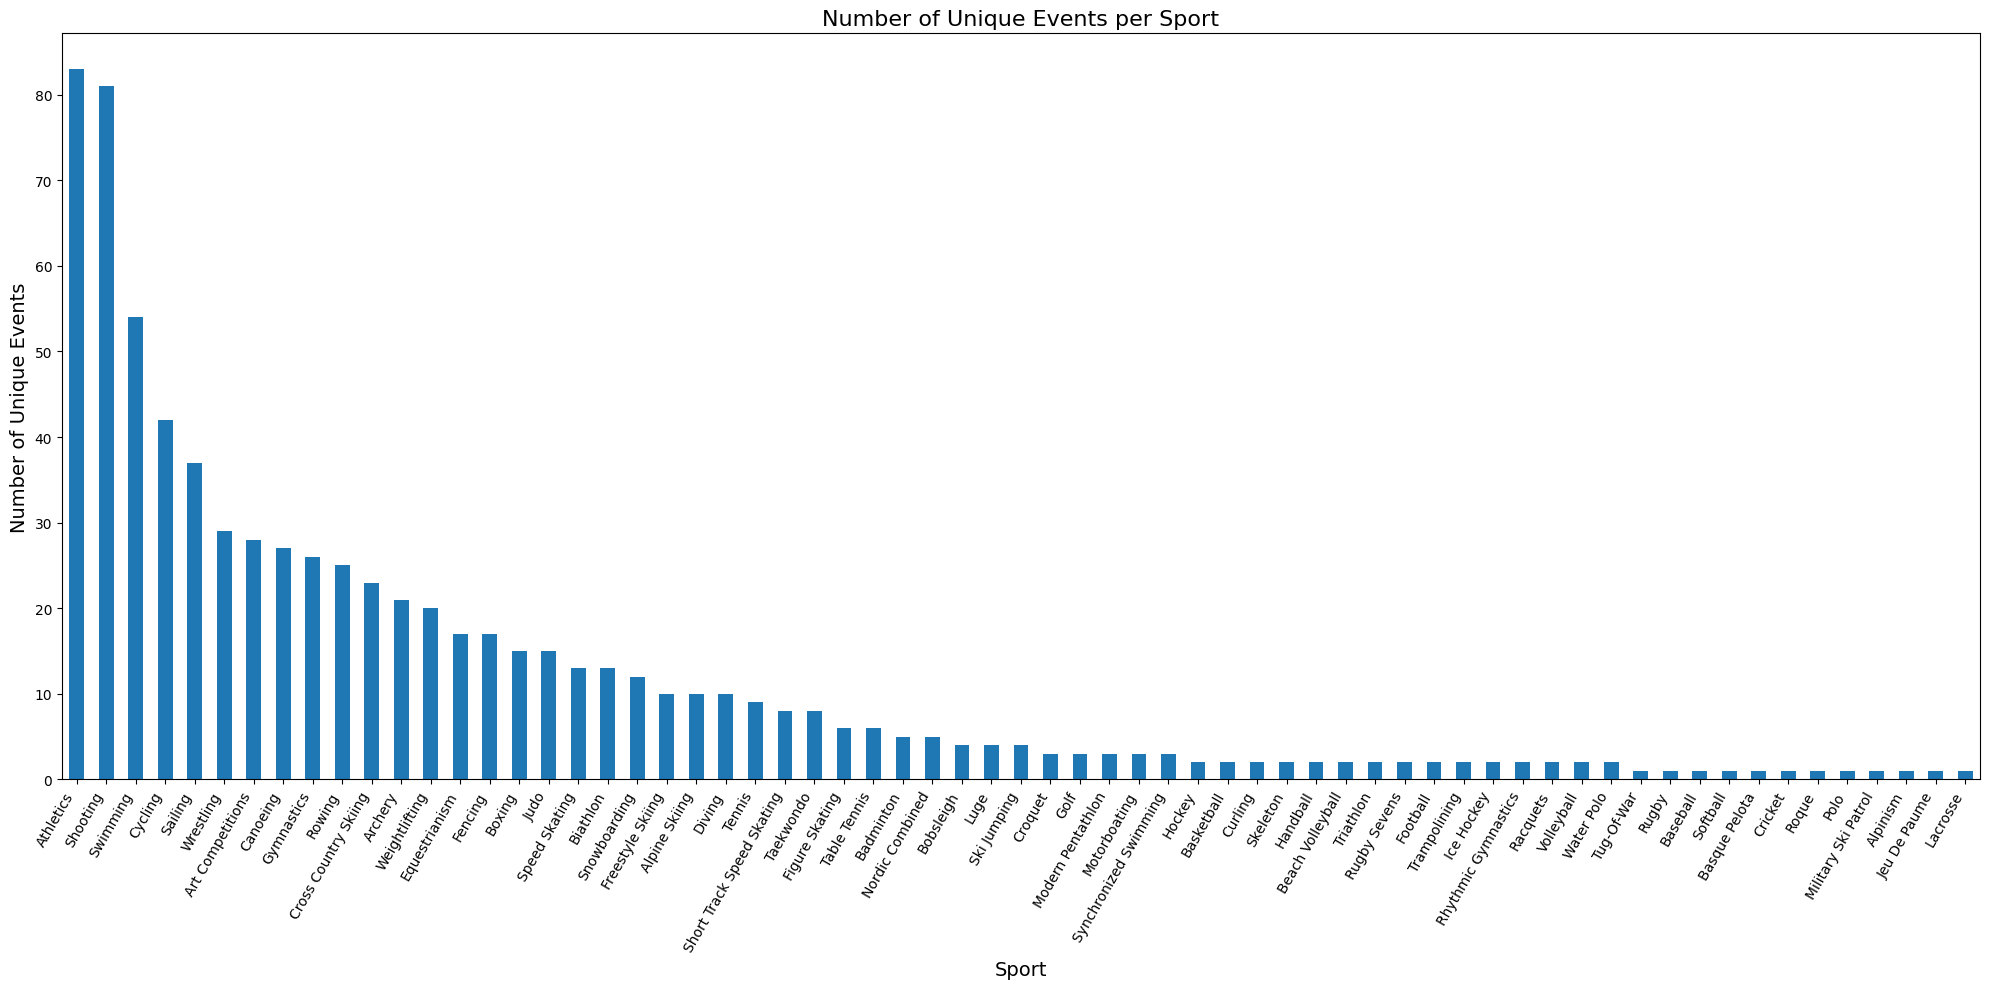

In [69]:
spot_event_count = data.groupby("Sport")["Event"].nunique().sort_values(ascending=False)
plt.figure(figsize=(20, 10)) 
spot_event_count.plot(kind="bar")
plt.title("Number of Unique Events per Sport", fontsize=16)
plt.xlabel("Sport", fontsize=14)
plt.ylabel("Number of Unique Events", fontsize=14)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


##### The sports with the highest number of unique events are Athletics and Swimming, followed by Shooting, Cycling, and Gymnastics. 

### Which years had the highest or lowest number of participants?

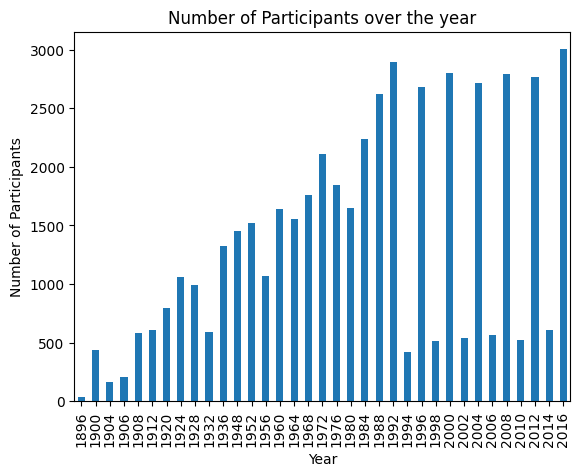

In [70]:
year_participant_count=data.groupby("Year")["ID"].nunique()
year_participant_count.plot(kind="bar")
plt.title("Number of Participants over the year")
plt.xlabel("Year")
plt.ylabel("Number of Participants")
plt.show()

##### The chart shows that the highest number of participants occurred in the 2016 Olympics, with participation peaking at over 3,000 athletes. In contrast, the earliest games like 1896 and 1900 had the fewest participants, 

### Which countries have the oldest average age of participants?



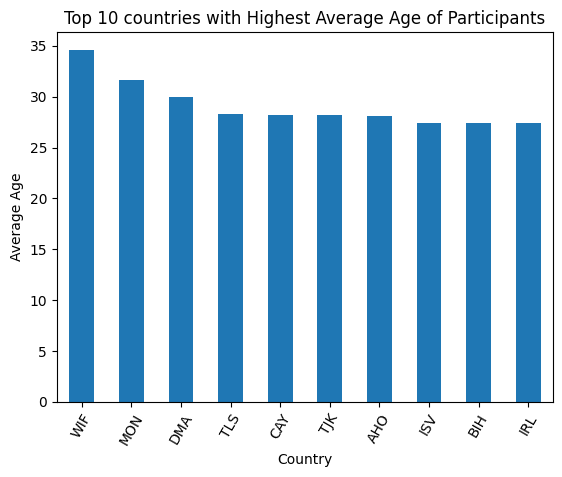

In [71]:
country_ave_age=data.groupby("NOC")["Age"].mean().sort_values(ascending=False)
country_ave_age.head(10).plot(kind="bar")
plt.title("Top 10 countries with Highest Average Age of Participants")
plt.xlabel("Country")
plt.ylabel("Average Age")
plt.xticks(rotation=60)
plt.show()

##### The top countries with the oldest average age of participants include WIF (West Indies Federation), MON (Monaco), and DMA (Dominica). 

### Which countries have the youngest average age of participants?



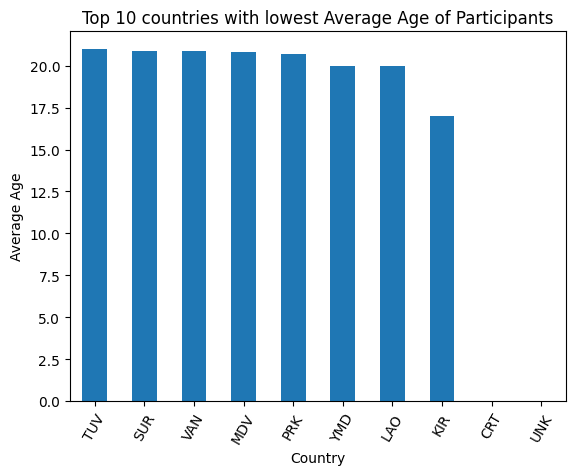

In [72]:
country_ave_age=data.groupby("NOC")["Age"].mean().sort_values(ascending=False)
country_ave_age.tail(10).plot(kind="bar")
plt.title("Top 10 countries with lowest Average Age of Participants")
plt.xlabel("Country")
plt.ylabel("Average Age")
plt.xticks(rotation=60)
plt.show()

##### The countries with the youngest average age of participants include TUV (Tuvalu), SUR (Suriname), and VAN (Vanuatu). These nations  send younger athletes, possibly due to developing sports programs or focus on youth talent development.

### Are there any notable outliers in athlete ages by season?

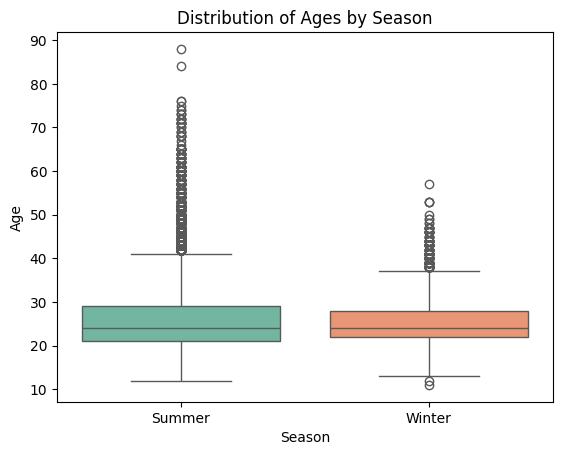

In [73]:
sns.boxplot(data=data, x="Season", y="Age", hue="Season", palette="Set2", legend=False)
plt.title("Distribution of Ages by Season")
plt.xlabel("Season")
plt.ylabel("Age")
plt.show()


##### Some athletes in both Summer and Winter Olympics are much older than others, especially in the Summer games.

### How does the height distribution differ among Gold, Silver, and Bronze medalists?

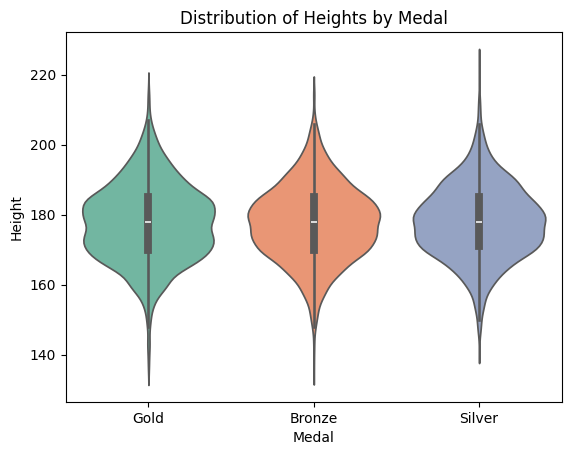

In [74]:
sns.violinplot(data=data, x="Medal", y="Height", hue="Medal", palette="Set2", legend=False)
plt.title("Distribution of Heights by Medal")
plt.xlabel("Medal")
plt.ylabel("Height")
plt.show()

##### The analysis shows that gold medalists tend to be slightly taller on average than silver and bronze medalists. Most medalists fall within the 175–185 cm height range, suggesting an optimal height advantage in many Olympic sports.

In [75]:
most_medals_country=data["NOC"].value_counts().idxmax()
print("Most medal winning country:",most_medals_country)

Most medal winning country: USA


##### Most medal winning country from 1896 to 2016 is USA.

In [76]:
tallest_athlete = data[data["Height"] == data["Height"].max()]
print("Tallest Athlete:\n", tallest_athlete[["ID", "Name", "Height", "Sport"]])


Tallest Athlete:
           ID                  Name  Height       Sport
32376  16639  Tommy Loren Burleson   223.0  Basketball


##### Tallest athlete is Tommy Loren Burleson sport type is Basketball with  height is 223 cm.

In [77]:
heaviest_athlete = data[data["Weight"] == data["Weight"].max()]
print("Heaviest Athlete:\n", heaviest_athlete[["ID", "Name", "Weight", "Sport"]])


Heaviest Athlete:
           ID               Name  Weight Sport
23155  12177  Ricardo Blas, Jr.   214.0  Judo
23156  12177  Ricardo Blas, Jr.   214.0  Judo


##### heaviest athelete is Ricardo Blas, Jr.  sport type is Judo with weight is 214 KG.

### How does the relationship between height and weight vary by medal type?

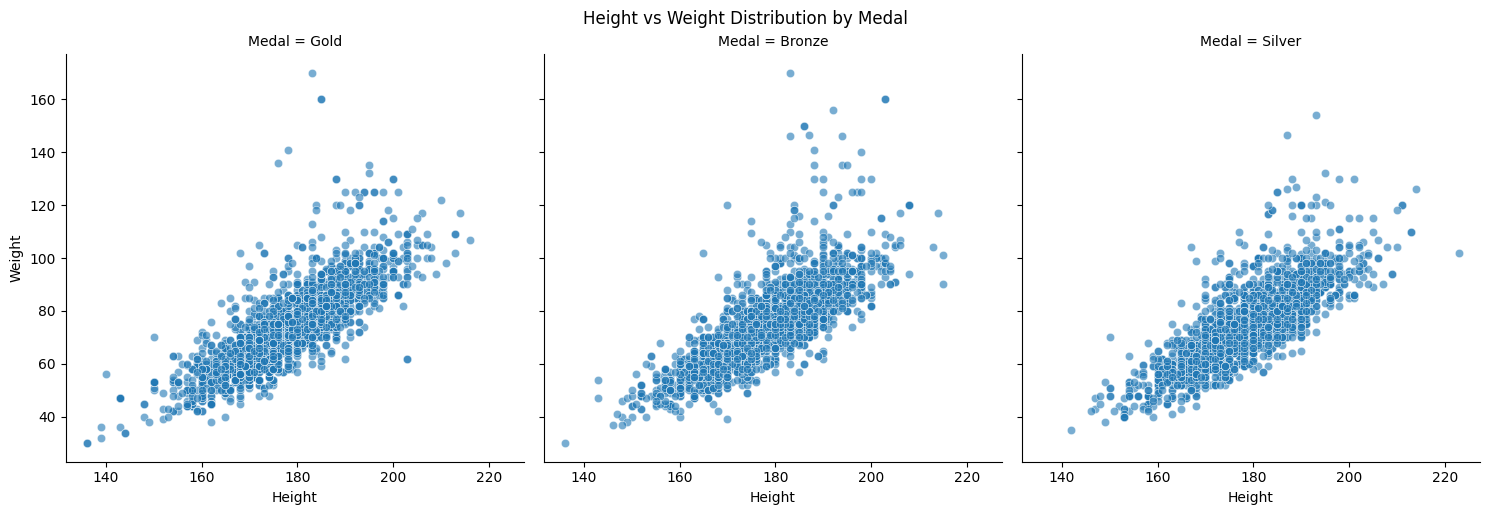

In [78]:
g = sns.FacetGrid(data, col="Medal", col_wrap=3, height=5)
g.map_dataframe(sns.scatterplot, x="Height", y="Weight", alpha=0.6)
g.set_axis_labels("Height", "Weight")
g.fig.suptitle("Height vs Weight Distribution by Medal", y=1.02)
plt.show()


##### Across all three medal types (Gold, Silver, and Bronze), there is a clear positive correlation between height and weight—taller athletes tend to weigh more. 

### Which countries consistently win medals across many Olympic events?

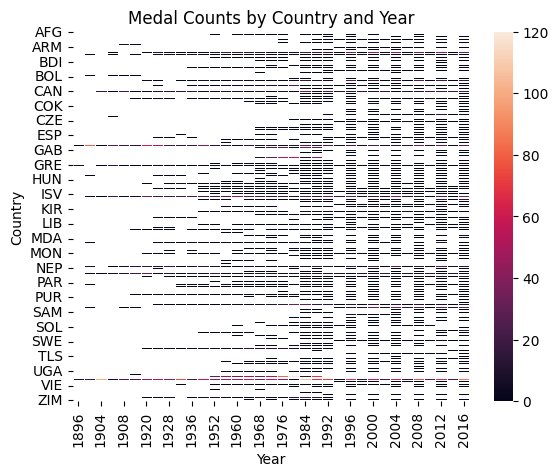

In [79]:
medals_by_country = data.pivot_table(index="NOC", columns="Year", values="Medal", aggfunc="count")
sns.heatmap(medals_by_country, linewidths=0.5)
plt.title("Medal Counts by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


##### The heatmap reveals that countries like the USA, CAN, ESP, and SWE consistently won medals across many Olympic years, as shown by the dense and recurring color patterns. This indicates strong and sustained performances in various events over time.

## Summary

#####
1. **Average Age by Country**: Countries like WIF and MON have the highest average participant age, while TUV and SUR have the youngest athletes on average.
2. **Medal-Winning Countries**: The USA has consistently won the most medals from 1896 to 2016, showing strong athletic dominance.
3. **Athlete Height & Weight**: Gold, Silver, and Bronze medalists show a strong positive correlation between height and weight; taller athletes tend to weigh more.
4. **Height Distribution by Medal**: Medalists across all categories generally fall within similar height ranges, but there are slight variations in spread and central tendency.
5. **Age by Season**: Athletes in the Summer Olympics show more age outliers than Winter athletes, suggesting broader age diversity.
6. **Medal Count Over Time**: Some countries show consistent medal wins across decades, indicating strong long-term sports programs.
7. **Heaviest Athlete**: Ricardo Blas Jr. is the heaviest recorded Olympic athlete, competing in Judo at 214 kg.
8. **Height/Weight Trends by Medal Type**: No extreme differences were seen between medal types, but all follow similar physical attribute patterns.
9. **Outliers**: Several visualizations revealed outliers, such as unusually tall, short, young, or old athletes—worth deeper examination for sport-specific trends.
